### Need to Try Jigsaw Unintended Bias in Toxicity Classification  

#### https://www.kaggle.com/competitions/jigsaw-unintended-bias-in-toxicity-classification 
#### https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/code?competitionId=12500&sortBy=voteCount&excludeNonAccessedDatasources=true
#### https://github.com/dataforcast/NLP1?tab=readme-ov-file

## Introduction:

To Filter out some online hate which occurs in our daily life due to some toxic people's anoymity

## Objective:
Build a multi-headed model capable of detecting and assigning probabilities for different types of of toxicity such as: 
1. toxic
2. severe toxic
3. obscene
4. threat
5. insult
6. identity hate

The dataset comprises of comments from Wikipedia's talk page (ie. discussion) pages.

Dataset: https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge

## Import relevant libraries and load the data

In [1]:
# Install the nltk library in case you have not yet installed it
# pip stands for preferred installer program under Python Package Index (PyPI)

!pip install nltk

  Using cached nltk-3.8.1-py3-none-any.whl (1.5 MB)
                                              0.0/269.0 kB ? eta -:--:--
     ----                                    30.7/269.0 kB 1.4 MB/s eta 0:00:01
     ----                                    30.7/269.0 kB 1.4 MB/s eta 0:00:01
     ----                                    30.7/269.0 kB 1.4 MB/s eta 0:00:01
     ---------                             71.7/269.0 kB 393.8 kB/s eta 0:00:01
     ---------                             71.7/269.0 kB 393.8 kB/s eta 0:00:01
     --------------------------           194.6/269.0 kB 737.3 kB/s eta 0:00:01
     --------------------------           194.6/269.0 kB 737.3 kB/s eta 0:00:01
     -------------------------------      235.5/269.0 kB 686.8 kB/s eta 0:00:01
     --------------------------------     245.8/269.0 kB 686.6 kB/s eta 0:00:01
     --------------------------------     245.8/269.0 kB 686.6 kB/s eta 0:00:01
     ------------------------------------ 269.0/269.0 kB 592.0 kB/s eta 0:0


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
#mandatory libraries
import os
import re
import string
import numpy as np
import pandas as pd

#plotting libraries
import matplotlib_venn as venn
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


#NLTK libraries  & for data cleaning
import contractions
import nltk
from nltk.tree import Tree
from nltk.corpus import stopwords
from nltk import ne_chunk, pos_tag, word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from wordcloud import WordCloud, STOPWORDS

#sk-learn libraries for vectorization and TSNE
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

#miscellaneous libraries
import warnings
warnings.filterwarnings("ignore")
from tqdm.notebook import tqdm
from itertools import combinations 

ModuleNotFoundError: No module named 'matplotlib_venn'

In [17]:
# Import relevant packages
import matplotlib.pyplot as plt
import nltk
import numpy as np
import re 
import pandas as pd
import string
import seaborn as sns

from nltk.corpus import stopwords  # Used to Remove the useless words
from nltk.stem.lancaster import LancasterStemmer  #It Converts the words to base form; aggressive

# Import packages that help us to create document-term matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


In [3]:
eng_stopwords = set(stopwords.words("english"))

In [4]:
# In case there is a bug, just download stopwords again.
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\iftek\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [121]:
# Stopwords are a list of 'useless' words
set(stopwords.words('english'))

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

## Understanding Our Data:

In [6]:
data = pd.read_csv('C:/Users/iftek/Downloads/train.csv')
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


Entries with all 0 under the 6 categories are neutral and considered as non-toxic.

In [7]:
for i in data.columns.values[2:]:
    print(data[i].value_counts())
    print("="*50)

toxic
0    144277
1     15294
Name: count, dtype: int64
severe_toxic
0    157976
1      1595
Name: count, dtype: int64
obscene
0    151122
1      8449
Name: count, dtype: int64
threat
0    159093
1       478
Name: count, dtype: int64
insult
0    151694
1      7877
Name: count, dtype: int64
identity_hate
0    158166
1      1405
Name: count, dtype: int64


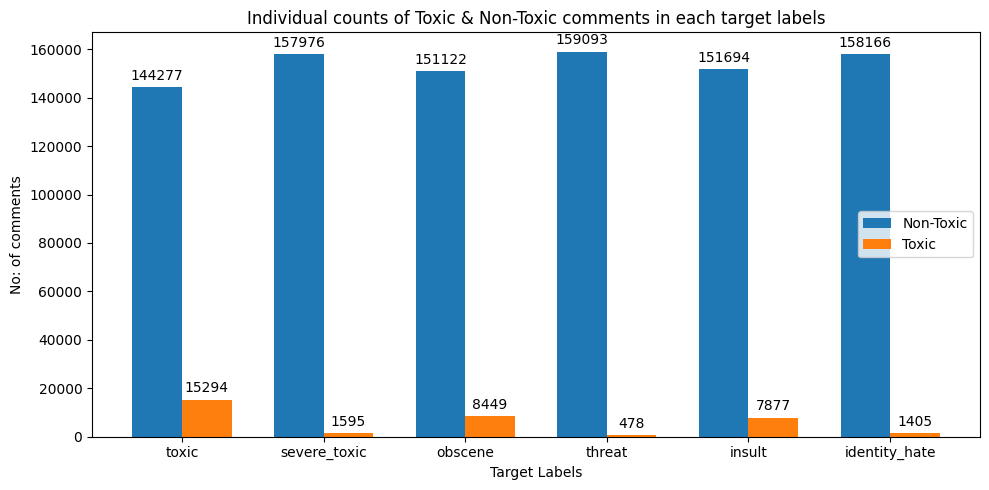

In [8]:
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html

labels = data.columns.values[2:]
class_0=[]
class_1=[]

for i in data.columns.values[2:]:
    vc=data[i].value_counts()
    class_0.append(vc[0])
    class_1.append(vc[1])

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10,5))
rects1 = ax.bar(x - width/2, class_0, width, label='Non-Toxic')
rects2 = ax.bar(x + width/2, class_1, width, label='Toxic')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('No: of comments')
ax.set_xlabel("Target Labels")
ax.set_title('Individual counts of Toxic & Non-Toxic comments in each target labels')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc=7)

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

ax.bar
fig.tight_layout()

plt.show()

In [9]:
lbls=data.values[:,2:] #taking only target label data for all rows 
lbls=np.array(lbls,dtype=int) #converting into numpy array
col_lbls=np.unique(lbls, return_counts=True,axis=0)
col_lbls_df=pd.DataFrame(columns=data.columns.values[2:],data=col_lbls[0])
col_lbls_df['count']=col_lbls[1]
col_lbls_df=col_lbls_df.sort_values(by=['count'],ascending=False)


print("Shape of the Collective Labels (including count-column) = ",col_lbls_df.shape)
print("\n")
col_lbls_df

Shape of the Collective Labels (including count-column) =  (41, 7)




,toxic,severe_toxic,obscene,threat,insult,identity_hate,count
0,0,0,0,0,0,0,143346
12,1,0,0,0,0,0,5666
22,1,0,1,0,1,0,3800
20,1,0,1,0,0,0,1758
14,1,0,0,0,1,0,1215
36,1,1,1,0,1,0,989
23,1,0,1,0,1,1,618
6,0,0,1,0,0,0,317
2,0,0,0,0,1,0,301
37,1,1,1,0,1,1,265


We have total of 6 target labels represented in binary format ( i.e, 1 represents, the comment belongs to a particular target label and 0 represents, the comment doesnot belongs to a particular target label). Logically, 2^6 = 64 combinations are possible. but we have data for only 41 combinations.

Out of 1,59,571 comments, 1,43,346 comments belongs to none of the target labels. In other words, 89.832% of total data, has zeros in all the target labels.

From point 2, we can also conclude that only 16,225 comments belongs to atleast one of the 6 target labels.

Out of 16,225 comments, that are classified as "Positive", 5,666 comments belongs to only label-"toxic" alone, which is 34.92% of positive labels.

Since it is hard to plot all the available combinations of labels and their counts, let us count a comment that is toxic or non-toxic by considering a comment as toxic if it belongs to atleast any one of the target labels or otherwise non-toxic.

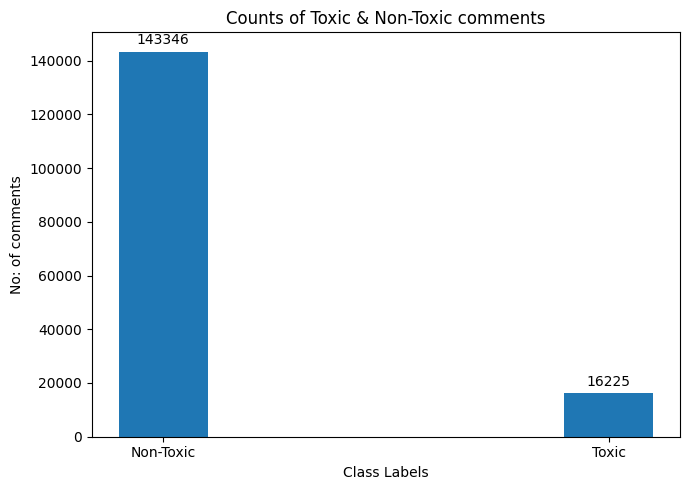

In [10]:
#plotting toxic & non-toxic comment counts, considering from above statement
Categories=["Non-Toxic","Toxic"]
values=[0,0]

for row in col_lbls_df.values:
    if (sum(row[:-1])==0):
        values[0]=values[0]+row[-1]
    else:
        values[1]=values[1]+row[-1]

fig, ax = plt.subplots(figsize=(7,5))
rects1 = ax.bar(Categories, values, 0.2)
ax.set_ylabel('No: of comments')
ax.set_xlabel("Class Labels")
ax.set_title('Counts of Toxic & Non-Toxic comments')
ax.bar_label(rects1, padding=3)
fig.tight_layout()
plt.show()

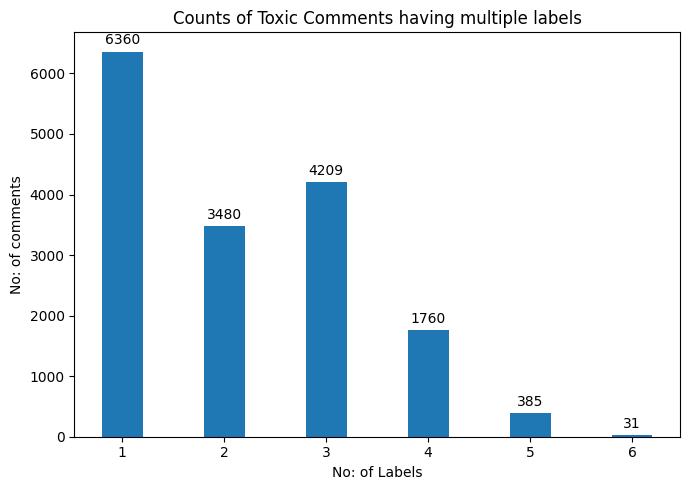

In [11]:
no_of_possible_labels=np.arange(1,7)
values=np.zeros(6,dtype=int)

for row in col_lbls_df.values:
    if (sum(row[:-1])==1):
        values[0]=values[0]+row[-1]

    elif (sum(row[:-1])==2):
        values[1]=values[1]+row[-1]

    elif (sum(row[:-1])==3):
        values[2]=values[2]+row[-1]
    
    elif (sum(row[:-1])==4):
        values[3]=values[3]+row[-1]
    
    elif (sum(row[:-1])==5):
        values[4]=values[4]+row[-1]

    elif (sum(row[:-1])==6):
        values[5]=values[5]+row[-1]

fig, ax = plt.subplots(figsize=(7,5))
rects1 = ax.bar(no_of_possible_labels, values, 0.4)
ax.set_ylabel('No: of comments')
ax.set_xlabel("No: of Labels")
ax.set_title('Counts of Toxic Comments having multiple labels')
ax.bar_label(rects1, padding=3)
fig.tight_layout()
plt.show()


Considering all the targets labels, there are 1,43,346 comments belongs to none of the target labels ie Non-Toxic. It is 89.832% of total data.

There are 16,225 comments belongs to atleast one of the 6 target labels, i.e toxic comments.

Out of 16,225 comments that are classified as "Positive", 6,360 comments are having only one target label. In other words 39.198 % of total comments classified as "toxic" under atlease one category.

Earlier we studied that 5,666 comments belongs to only label-"toxic".

From 1 & 2 we can conclude that only 694 (6360 - 5666 = 694) comments belongs to remaining 5 target labels individually.

Only 31 comments are classified under all the target labels, which is 0.1910 % of positive data points.

In [12]:
no_of_labels= np.arange(2,6)
rows_col=[(5,3),(5,4),(5,3),(2,3)]


for i,rc in zip(no_of_labels,rows_col):
    comb = combinations(data.columns.values[2:], i)
    fig, top_axs = plt.subplots(ncols=rc[1], nrows=rc[0],figsize=(20, 20))
    fig.suptitle("Venn diagram - considering "+str(i)+" Target Labels",fontsize=24)
    fig.subplots_adjust(top=0.88)
    fig.tight_layout()
    top_axs=top_axs.flatten()
    for j,ax in zip(list(comb),top_axs):
        data_set=dict()
        for k in j:
            data_set[k]=set(data[(data[k]==1)].index)
        venn_dgrm=venn.venn(data_set,legend_loc="best",alpha=0.4,fontsize=10,ax=ax)

NameError: name 'combinations' is not defined

A clean dataset with no missing values. Sweet!

# Some Example Comments from the Dataset:

In [7]:
print("Toxic:")
print(data[data.toxic==1].iloc[7,1])

Toxic:
Stupid peace of shit stop deleting my stuff asshole go die and fall in a hole go to hell!


In [8]:
print("Severe_Toxic:")
print(data[data.severe_toxic==1].iloc[4,1])

Severe_Toxic:
What a motherfucking piece of crap those fuckheads for blocking us!


In [9]:
print("Threat:")
print(data[data.threat==1].iloc[1,1])

Threat:
I think that your a Fagget get a oife and burn in Hell I hate you 'm sorry we cant have any more sex i'm running out of conndoms


In [32]:
print("Obscene:")
print(data[data.obscene==1].iloc[1,1])

Obscene:
You are gay or antisemmitian? 

Archangel WHite Tiger

Meow! Greetingshhh!

Uh, there are two ways, why you do erased my comment about WW2, that holocaust was brutally slaying of Jews and not gays/Gypsys/Slavs/anyone...

1 - If you are anti-semitian, than shave your head bald and go to the skinhead meetings!

2 - If you doubt words of the Bible, that homosexuality is a deadly sin, make a pentagram tatoo on your forehead go to the satanistic masses with your gay pals!

3 - First and last warning, you fucking gay - I won't appreciate if any more nazi shwain would write in my page! I don't wish to talk to you anymore!

Beware of the Dark Side!


In [11]:
print("identity_hate:")
print(data[data.identity_hate==1].iloc[4,1])

identity_hate:
u r a tw@ fuck off u gay boy.U r smelly.Fuck ur mum poopie


## Exploratory Data Analysis

In [33]:
# Check percentage of comments that are toxic compared to normal comments
data.toxic.value_counts(normalize=True)

toxic
0    0.904156
1    0.095844
Name: proportion, dtype: float64

Cool. It seems that 90% of the comments fall in the toxic category.

In [34]:
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [35]:
#Create a new subset of the data by only taking the 2nd column onwards (comments and categories)
data_count=data.iloc[:,2:].sum()

In [36]:
data_count

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64

In [37]:
 data_count.index

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [38]:
data_count.values

array([15294,  1595,  8449,   478,  7877,  1405], dtype=int64)

In [43]:
sns_data = pd.DataFrame({'Class Label': data_count.index, 'Frequency':data_count.values})
sns_data

,Class Label,Frequency
0,toxic,15294
1,severe_toxic,1595
2,obscene,8449
3,threat,478
4,insult,7877
5,identity_hate,1405


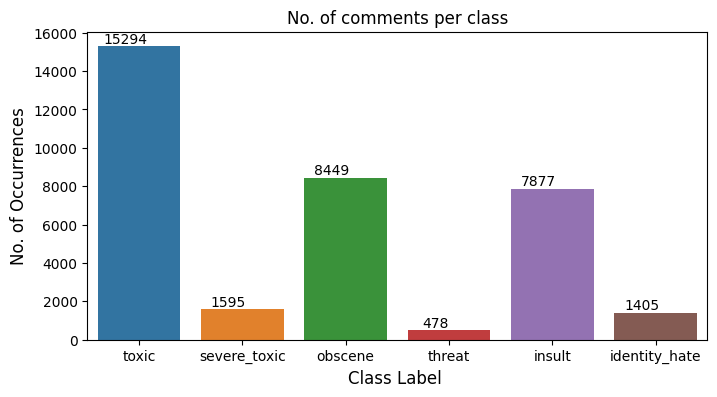

In [47]:
# Plot a chart with the following size
plt.figure(figsize=(8,4))

# Plot a bar chart using the index (category values) and the count of each category. alpha = 0.8 to make the bars more translucent
# ax = sns.barplot(data_count.index, data_count.values, alpha=0.8)
ax = sns.barplot(x='Class Label', y='Frequency', data=sns_data)

plt.title("No. of comments per class")
plt.ylabel('No. of Occurrences', fontsize=12)
plt.xlabel('Class Label ', fontsize=12)

#adding the text labels for each bar
rects = ax.patches
labels = data_count.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/3, height + 7, label, ha='center', va='bottom')

plt.show()

In [30]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [48]:
num_rows = len(data)
print(num_rows)

159571


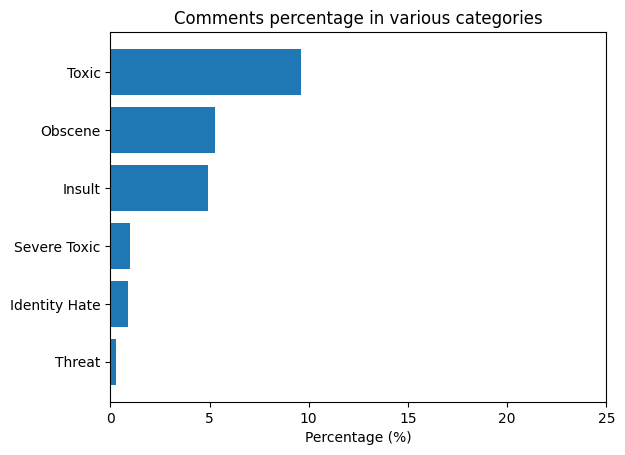

In [54]:
# Create a bar graph 
sum_tox = data['toxic'].sum() / num_rows * 100
sum_sev = data['severe_toxic'].sum() / num_rows * 100
sum_obs = data['obscene'].sum() / num_rows * 100
sum_thr = data['threat'].sum() / num_rows * 100
sum_ins = data['insult'].sum() / num_rows * 100
sum_ide = data['identity_hate'].sum() / num_rows * 100

# Initiate a list of 6 values that represent the 6 x-axis values for the categories
ind = np.arange(6)

# Let the ind variable be the x-axis, whereas the % of toxicity for each category be the y-axis.
# Sequence of % have been sorted manually. This method cannot be done if there are large numbers of categories.
ax = plt.barh(ind, [sum_tox, sum_obs, sum_ins, sum_sev, sum_ide, sum_thr])
plt.xlabel('Percentage (%)', size=10)
plt.xticks(np.arange(0, 30, 5), size=10)
plt.title('Comments percentage in various categories')
plt.yticks(ind, ('Toxic', 'Obscene', 'Insult', 'Severe Toxic', 'Identity Hate', 'Threat', ))

# Invert the graph so that it is in descending order.
plt.gca().invert_yaxis()
plt.show()


## Preprocessing Data:

In [55]:
# Text preprocessing steps - remove numbers, capital letters, punctuation, '\n'
import re
import string

# remove all numbers with letters attached to them
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)

# '[%s]' % re.escape(string.punctuation),' ' - replace punctuation with white space
# .lower() - convert all strings to lowercase 
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

# Remove all '\n' in the string and replace it with a space
remove_n = lambda x: re.sub("\n", " ", x)

# Remove all non-ascii characters 
remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ', x)

# Apply all the lambda functions wrote previously through .map on the comments column
data['comment_text'] = data['comment_text'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)

data['comment_text'][0]

'explanation why the edits made under my username hardcore metallica fan were reverted  they weren t vandalisms  just closure on some gas after i voted at new york dolls fac  and please don t remove the template from the talk page since i m retired now        '

#  Which tags go together?
Now let's have a look at how often the tags occur together. A good indicator of that would be a correlation plot.

<Axes: >

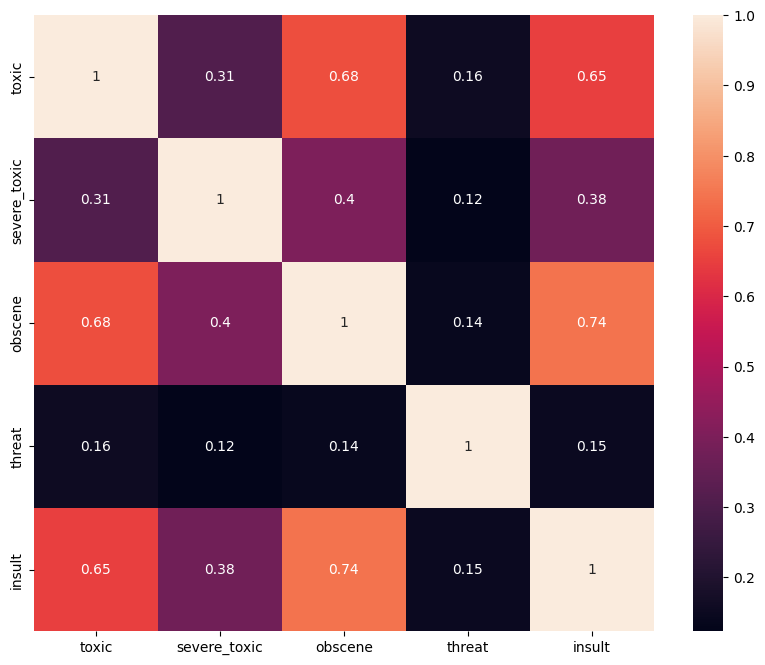

In [56]:
temp_df=data.iloc[:,2:-1]
# filter temp by removing clean comments because we don't need clean tag here
# temp_df=temp_df[~train.clean]

corr=temp_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True)


The above plot indicates a pattern of co-occurance but Pandas's default Corr function which uses Pearson correlation does not apply here, since the variables invovled are Categorical (binary) variables.

So, to find a pattern between two categorical variables we can use other tools like

1) Cramer's V Statistic     
2) Confusion matrix   
 


## Separate our dataset into 6 sections. Each section is comment + 1 category.

In [57]:
data_tox = data.loc[:,['id','comment_text','toxic']]

In [58]:
data_tox['comment_text'][0]

'explanation why the edits made under my username hardcore metallica fan were reverted  they weren t vandalisms  just closure on some gas after i voted at new york dolls fac  and please don t remove the template from the talk page since i m retired now        '

In [59]:
data_tox['comment_text'][1]

'd aww  he matches this background colour i m seemingly stuck with  thanks    talk       january       utc '

In [61]:
data_sev = data.loc[:,['id','comment_text','severe_toxic']]

In [62]:
data_obs = data.loc[:,['id','comment_text','obscene']]

In [63]:
data_thr = data.loc[:,['id','comment_text','threat']]

In [64]:
data_ins = data.loc[:,['id','comment_text','insult']]

In [65]:
data_ide = data.loc[:,['id','comment_text','identity_hate']]

## Creating WordCloud
### Useful to show the words which occur most frequently for each category. Warning: Profanity ahead.

In [66]:
import wordcloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords

In [101]:
def wordcloud(df, label):
    
    # Print only rows where the toxic category label value is 1 (ie. the comment is toxic)
    subset=df[df[label]==1]
    text=subset.comment_text.values
    wc= WordCloud(background_color="white",max_words=4000)

    wc.generate(" ".join(text))

    plt.figure(figsize=(20,20))
    plt.subplot(221)
    plt.axis("off")
    plt.title("Words frequented in {}".format(label), fontsize=20)
    plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)

In [71]:
data_tox.columns

Index(['id', 'comment_text', 'toxic'], dtype='object')

In [81]:
data_tox

,id,comment_text,toxic
0,0000997932d777bf,explanation why the edits made under my userna...,0
1,000103f0d9cfb60f,d aww he matches this background colour i m s...,0
2,000113f07ec002fd,hey man i m really not trying to edit war it...,0
3,0001b41b1c6bb37e,more i can t make any real suggestions on im...,0
4,0001d958c54c6e35,you sir are my hero any chance you remember...,0
...,...,...,...
159566,ffe987279560d7ff,and for the second time of asking when ...,0
159567,ffea4adeee384e90,you should be ashamed of yourself that is a ...,0
159568,ffee36eab5c267c9,spitzer umm theres no actual article for pr...,0
159569,fff125370e4aaaf3,and it looks like it was actually you who put ...,0


In [84]:
data_tox['comment_text'] = data_tox['comment_text'].str.replace('fuck','f__k')
data_tox['comment_text'] = data_tox['comment_text'].str.replace('suck','s__k')
data_tox['comment_text'] = data_tox['comment_text'].str.replace('dickhead','d__khead')
data_tox['comment_text'] = data_tox['comment_text'].str.replace('fucking','f__king')
data_tox['comment_text'] = data_tox['comment_text'].str.replace('fucksex','f__ks_x')
data_tox['comment_text'] = data_tox['comment_text'].str.replace('cocksucker','c__ks__er')
data_tox['comment_text'] = data_tox['comment_text'].str.replace('fucker','f__ker')
data_tox['comment_text'] = data_tox['comment_text'].str.replace('fuck','f__k')
data_tox['comment_text'] = data_tox['comment_text'].str.replace('fuck','f__k')

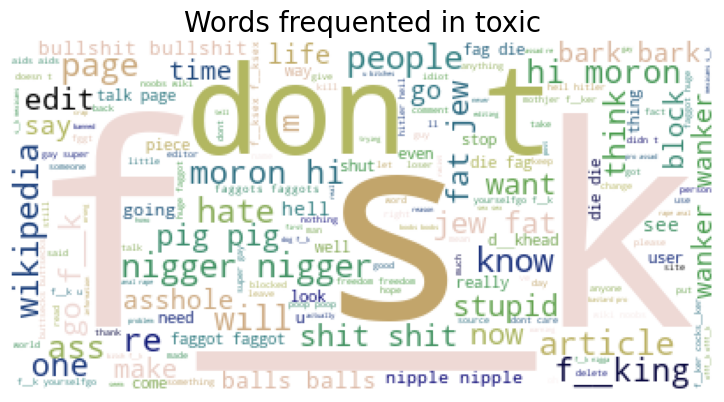

In [102]:
wordcloud(data_tox, 'toxic')

In [91]:
data_sev['comment_text'] = data_sev['comment_text'].str.replace('fuck','f__k')
data_sev['comment_text'] = data_sev['comment_text'].str.replace('suck','s__k')
data_sev['comment_text'] = data_sev['comment_text'].str.replace('dickhead','d__khead')
data_sev['comment_text'] = data_sev['comment_text'].str.replace('fucking','f__king')
data_sev['comment_text'] = data_sev['comment_text'].str.replace('fucksex','f__ks_x')
data_sev['comment_text'] = data_sev['comment_text'].str.replace('cocksucker','c__ks__er')
data_sev['comment_text'] = data_sev['comment_text'].str.replace('fucker','f__ker')
data_sev['comment_text'] = data_sev['comment_text'].str.replace('fuck','f__k')
data_sev['comment_text'] = data_sev['comment_text'].str.replace('fuck','f__k')
data_sev['comment_text'] = data_sev['comment_text'].str.replace('ass','a_s')
data_sev['comment_text'] = data_sev['comment_text'].str.replace('bastard','b__t__d')
data_sev['comment_text'] = data_sev['comment_text'].str.replace('shit','sh_t')
data_sev['comment_text'] = data_sev['comment_text'].str.replace('sex','s_x')

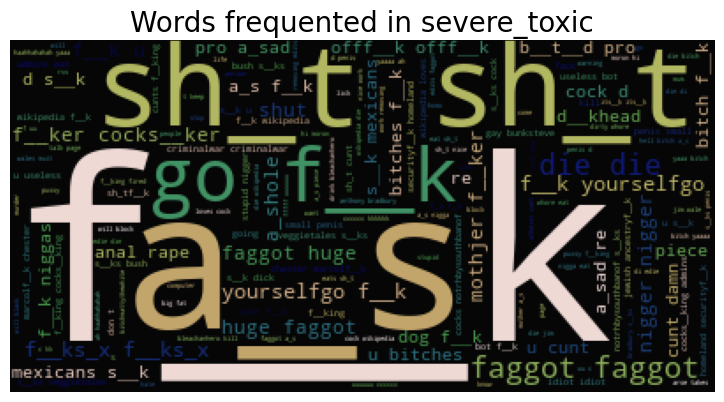

In [92]:
wordcloud(data_sev, 'severe_toxic')

In [93]:
data_obs['comment_text'] = data_obs['comment_text'].str.replace('fuck','f__k')
data_obs['comment_text'] = data_obs['comment_text'].str.replace('suck','s__k')
data_obs['comment_text'] = data_obs['comment_text'].str.replace('dickhead','d__khead')
data_obs['comment_text'] = data_obs['comment_text'].str.replace('fucking','f__king')
data_obs['comment_text'] = data_obs['comment_text'].str.replace('fucksex','f__ks_x')
data_obs['comment_text'] = data_obs['comment_text'].str.replace('cocksucker','c__ks__er')
data_obs['comment_text'] = data_obs['comment_text'].str.replace('fucker','f__ker')
data_obs['comment_text'] = data_obs['comment_text'].str.replace('fuck','f__k')
data_obs['comment_text'] = data_obs['comment_text'].str.replace('fuck','f__k')
data_obs['comment_text'] = data_obs['comment_text'].str.replace('ass','a_s')
data_obs['comment_text'] = data_obs['comment_text'].str.replace('bastard','b__t__d')
data_obs['comment_text'] = data_obs['comment_text'].str.replace('shit','sh_t')
data_obs['comment_text'] = data_obs['comment_text'].str.replace('sex','s_x')

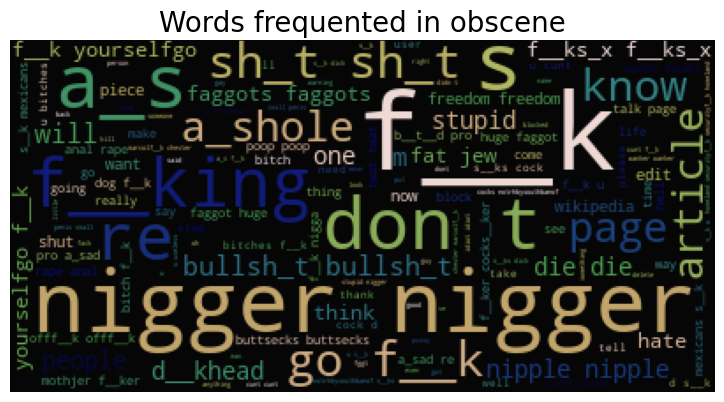

In [94]:
wordcloud(data_obs, 'obscene')

In [95]:
data_thr['comment_text'] = data_thr['comment_text'].str.replace('fuck','f__k')
data_thr['comment_text'] = data_thr['comment_text'].str.replace('suck','s__k')
data_thr['comment_text'] = data_thr['comment_text'].str.replace('dickhead','d__khead')
data_thr['comment_text'] = data_thr['comment_text'].str.replace('fucking','f__king')
data_thr['comment_text'] = data_thr['comment_text'].str.replace('fucksex','f__ks_x')
data_thr['comment_text'] = data_thr['comment_text'].str.replace('cocksucker','c__ks__er')
data_thr['comment_text'] = data_thr['comment_text'].str.replace('fucker','f__ker')
data_thr['comment_text'] = data_thr['comment_text'].str.replace('fuck','f__k')
data_thr['comment_text'] = data_thr['comment_text'].str.replace('fuck','f__k')
data_thr['comment_text'] = data_thr['comment_text'].str.replace('ass','a_s')
data_thr['comment_text'] = data_thr['comment_text'].str.replace('bastard','b__t__d')
data_thr['comment_text'] = data_thr['comment_text'].str.replace('shit','sh_t')
data_thr['comment_text'] = data_thr['comment_text'].str.replace('sex','s_x')

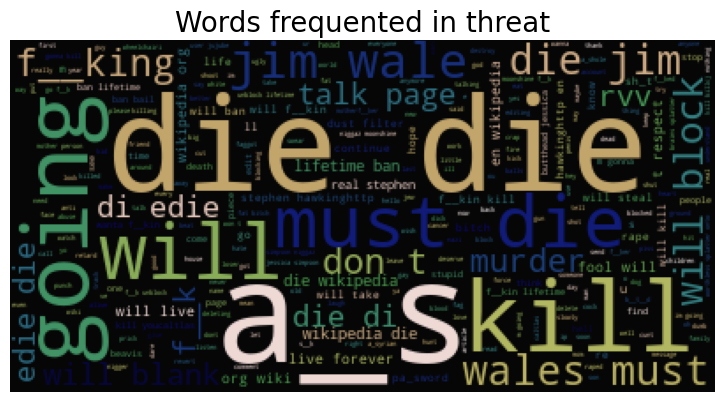

In [96]:
wordcloud(data_thr, 'threat')

In [97]:
data_ins['comment_text'] = data_ins['comment_text'].str.replace('fuck','f__k')
data_ins['comment_text'] = data_ins['comment_text'].str.replace('suck','s__k')
data_ins['comment_text'] = data_ins['comment_text'].str.replace('dickhead','d__khead')
data_ins['comment_text'] = data_ins['comment_text'].str.replace('fucking','f__king')
data_ins['comment_text'] = data_ins['comment_text'].str.replace('fucksex','f__ks_x')
data_ins['comment_text'] = data_ins['comment_text'].str.replace('cocksucker','c__ks__er')
data_ins['comment_text'] = data_ins['comment_text'].str.replace('fucker','f__ker')
data_ins['comment_text'] = data_ins['comment_text'].str.replace('fuck','f__k')
data_ins['comment_text'] = data_ins['comment_text'].str.replace('fuck','f__k')
data_ins['comment_text'] = data_ins['comment_text'].str.replace('ass','a_s')
data_ins['comment_text'] = data_ins['comment_text'].str.replace('bastard','b__t__d')
data_ins['comment_text'] = data_ins['comment_text'].str.replace('shit','sh_t')
data_ins['comment_text'] = data_ins['comment_text'].str.replace('sex','s_x')

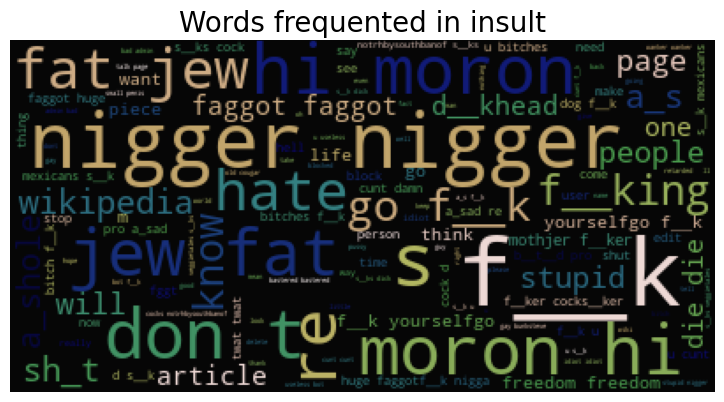

In [98]:
wordcloud(data_ins, 'insult')

In [99]:
data_ide['comment_text'] = data_ide['comment_text'].str.replace('fuck','f__k')
data_ide['comment_text'] = data_ide['comment_text'].str.replace('suck','s__k')
data_ide['comment_text'] = data_ide['comment_text'].str.replace('dickhead','d__khead')
data_ide['comment_text'] = data_ide['comment_text'].str.replace('fucking','f__king')
data_ide['comment_text'] = data_ide['comment_text'].str.replace('fucksex','f__ks_x')
data_ide['comment_text'] = data_ide['comment_text'].str.replace('cocksucker','c__ks__er')
data_ide['comment_text'] = data_ide['comment_text'].str.replace('fucker','f__ker')
data_ide['comment_text'] = data_ide['comment_text'].str.replace('fuck','f__k')
data_ide['comment_text'] = data_ide['comment_text'].str.replace('fuck','f__k')
data_ide['comment_text'] = data_ide['comment_text'].str.replace('ass','a_s')
data_ide['comment_text'] = data_ide['comment_text'].str.replace('bastard','b__t__d')
data_ide['comment_text'] = data_ide['comment_text'].str.replace('shit','sh_t')
data_ide['comment_text'] = data_ide['comment_text'].str.replace('sex','s_x')

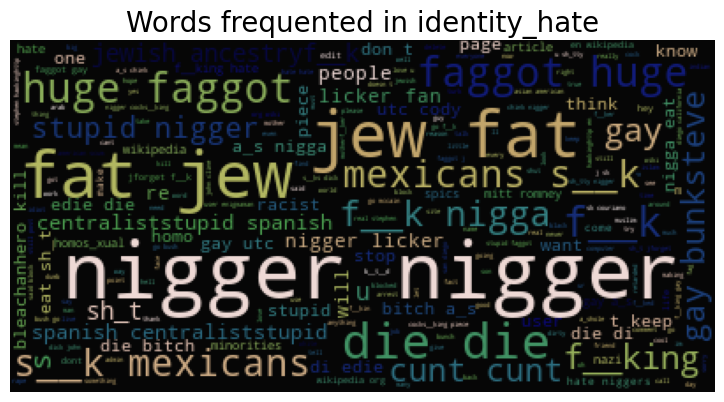

In [100]:
wordcloud(data_ide,'identity_hate')

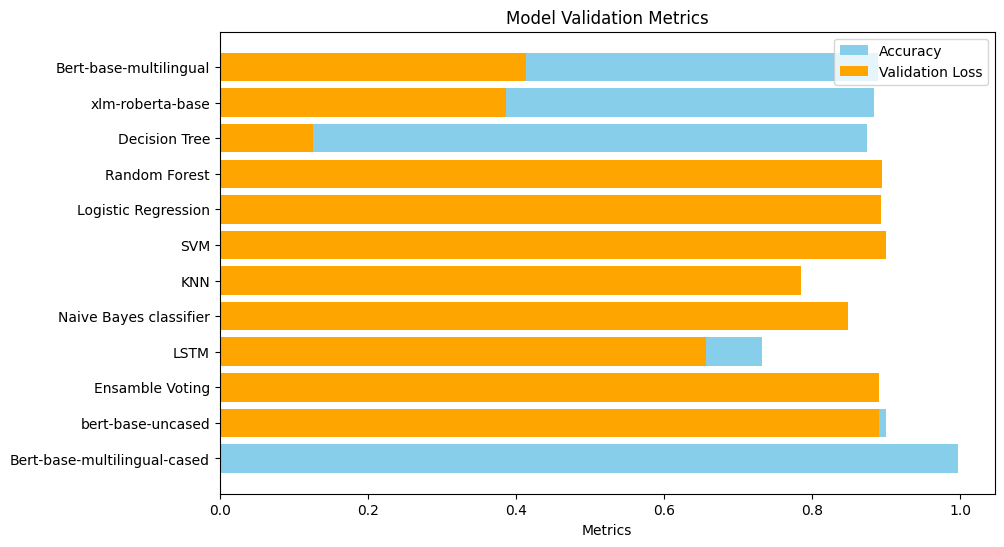

In [104]:
# Data
models = ['Bert-base-multilingual', 'xlm-roberta-base',
          'Decision Tree', 'Random Forest', 'Logistic Regression', 'SVM', 'KNN',
          'Naive Bayes classifier', 'LSTM', 'Ensamble Voting', 'bert-base-uncased', 'Bert-base-multilingual-cased']
accuracy = [0.8883, 0.8829, 0.8747, 0.8777, 0.8757, 0.8847, 0.7718, 0.8399, 0.7325, 0.8734, 0.9, 0.9967]
validation_loss = [0.4131, 0.3872, 0.1253, 0.8943, 0.8923, 0.8997, 0.7847, 0.8489, 0.6569, 0.8905, 0.89, 6.31e-7]

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(models, accuracy, color='skyblue', label='Accuracy')
plt.barh(models, validation_loss, color='orange', label='Validation Loss')

plt.xlabel('Metrics')
plt.title('Model Validation Metrics')
plt.legend()
plt.gca().invert_yaxis()  # Invert y-axis to display models from top to bottom
plt.show()


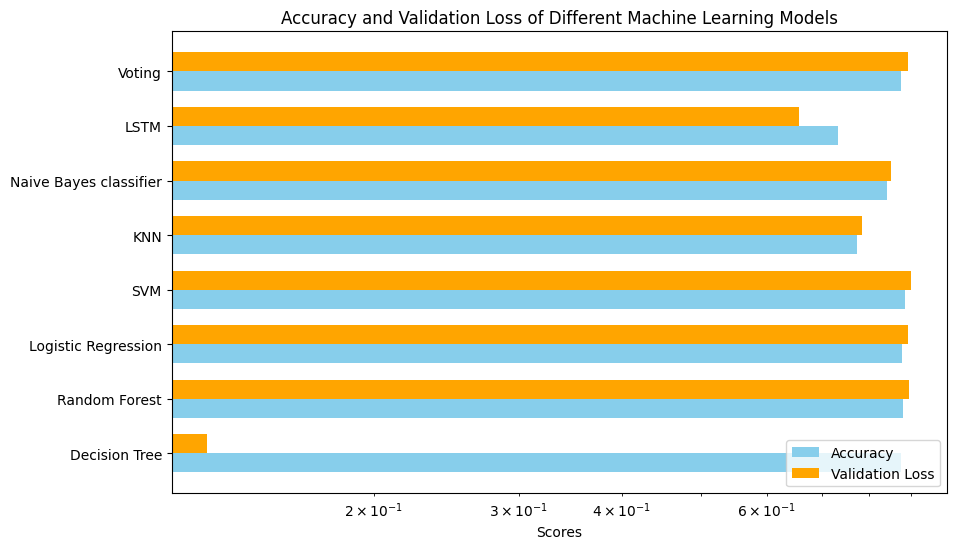

In [108]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['Decision Tree', 'Random Forest', 'Logistic Regression', 'SVM', 'KNN',
          'Naive Bayes classifier', 'LSTM', 'Voting']
accuracy = [0.8747, 0.8777, 0.8757, 0.8847, 0.7718, 0.8399, 0.7325, 0.8734]
validation_loss = [0.1253, 0.8943, 0.8923, 0.8997, 0.7847, 0.8489, 0.6569, 0.8905]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(models))

bars1 = ax.barh(index, accuracy, bar_width, color='skyblue', label='Accuracy')
bars2 = ax.barh(index + bar_width, validation_loss, bar_width, color='orange', label='Validation Loss')

ax.set_xlabel('Scores')
ax.set_title('Accuracy and Validation Loss of Different Machine Learning Models')
ax.set_yticks(index + bar_width / 2)
ax.set_yticklabels(models)
ax.set_xscale('log')  # Set log scale for x-axis

ax.legend()
plt.show()


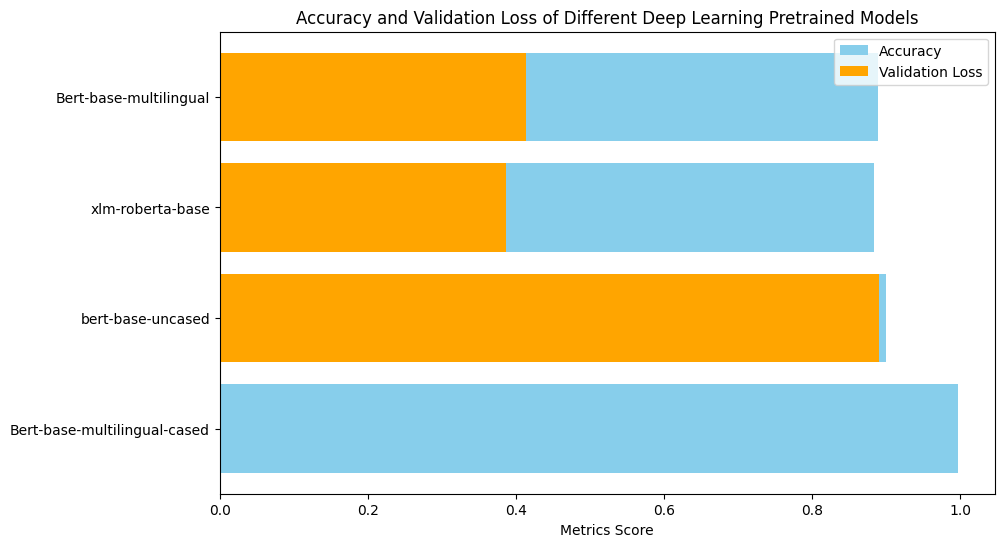

In [110]:

# Data
models = ['Bert-base-multilingual', 'xlm-roberta-base',
          'bert-base-uncased', 'Bert-base-multilingual-cased']
accuracy = [0.8883, 0.8829,  0.9, 0.9967]
validation_loss = [0.4131, 0.3872, 0.89, 6.31e-7]

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(models, accuracy, color='skyblue', label='Accuracy')
plt.barh(models, validation_loss, color='orange', label='Validation Loss')

plt.xlabel('Metrics Score')
plt.title('Accuracy and Validation Loss of Different Deep Learning Pretrained Models')
plt.legend()
plt.gca().invert_yaxis()  # Invert y-axis to display models from top to bottom
plt.show()


In [112]:
data

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0
1,000103f0d9cfb60f,d aww he matches this background colour i m s...,0,0,0,0,0,0
2,000113f07ec002fd,hey man i m really not trying to edit war it...,0,0,0,0,0,0
3,0001b41b1c6bb37e,more i can t make any real suggestions on im...,0,0,0,0,0,0
4,0001d958c54c6e35,you sir are my hero any chance you remember...,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,and for the second time of asking when ...,0,0,0,0,0,0
159567,ffea4adeee384e90,you should be ashamed of yourself that is a ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,spitzer umm theres no actual article for pr...,0,0,0,0,0,0
159569,fff125370e4aaaf3,and it looks like it was actually you who put ...,0,0,0,0,0,0


In [118]:
data.columns[1:]

Index(['comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [116]:
#Crosstab
# Since technically a crosstab between all 6 classes is impossible to vizualize, lets take a 
# look at toxic with other tags
main_col="toxic"
corr_mats=[]
for other_col in data.columns[1:]:
    confusion_matrix = pd.crosstab(data[main_col], data[other_col])
    corr_mats.append(confusion_matrix)
out = pd.concat(corr_mats,axis=1,keys=data.columns[1:])

#cell highlighting
out = out.style.apply(highlight_min,axis=0)
out

NameError: name 'highlight_min' is not defined

In [125]:
## Indirect features

#Sentense count in each comment:
    #  '\n' can be used to count the number of sentences in each comment
data['count_sent']=data["comment_text"].apply(lambda x: len(re.findall("\n",str(x)))+1)
#Word count in each comment:
data['count_word']=data["comment_text"].apply(lambda x: len(str(x).split()))
#Unique word count
data['count_unique_word']=data["comment_text"].apply(lambda x: len(set(str(x).split())))
#Letter count
data['count_letters']=data["comment_text"].apply(lambda x: len(str(x)))
#punctuation count
data["count_punctuations"] =data["comment_text"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
#upper case words count
data["count_words_upper"] = data["comment_text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
#title case words count
data["count_words_title"] = data["comment_text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
#Number of stopwords
data["count_stopwords"] = data["comment_text"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))
#Average length of the words
data["mean_word_len"] = data["comment_text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [128]:
#derived features
#Word count percent in each comment:
data['word_unique_percent']=data['count_unique_word']*100/data['count_word']
#derived features
#Punct percent in each comment:
data['punct_percent']=data['count_punctuations']*100/data['count_word']

In [132]:
len(data)-100

159471

In [130]:
#serperate train and test features
train_feats=data.iloc[0:len(data)-100,]
test_feats=data.iloc[len(data)-100:,]
#join the tags
train_tags=data.iloc[:,2:]
train_feats=pd.concat([train_feats,train_tags],axis=1)

In [134]:
train_feats

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,count_sent,count_word,...,count_word,count_unique_word,count_letters,count_punctuations,count_words_upper,count_words_title,count_stopwords,mean_word_len,word_unique_percent,punct_percent
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,43.0,...,43,41,264,10,2,11,18,5.162791,95.348837,23.255814
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,17.0,...,17,17,112,12,1,3,2,5.588235,100.000000,70.588235
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0.0,0.0,0.0,0.0,0.0,0.0,1.0,42.0,...,42,39,233,6,0,2,20,4.571429,92.857143,14.285714
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0.0,0.0,0.0,0.0,0.0,0.0,5.0,113.0,...,113,82,622,21,5,7,56,4.486726,72.566372,18.584071
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,...,13,13,67,5,0,2,5,4.230769,100.000000,38.461538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,47,44,295,18,0,2,19,5.212766,93.617021,38.297872
159567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18,18,99,4,0,2,11,4.388889,100.000000,22.222222
159568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12,12,81,4,0,4,2,5.583333,100.000000,33.333333
159569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25,23,116,1,1,2,15,3.680000,92.000000,4.000000


In [133]:
train_feats['count_sent'].loc[train_feats['count_sent']>10] = 10 
plt.figure(figsize=(12,6))
## sentenses
plt.subplot(121)
plt.suptitle("Are longer comments more toxic?",fontsize=20)
sns.violinplot(y='count_sent',x='clean', data=train_feats,split=True)
plt.xlabel('Clean?', fontsize=12)
plt.ylabel('# of sentences', fontsize=12)
plt.title("Number of sentences in each comment", fontsize=15)
# words
train_feats['count_word'].loc[train_feats['count_word']>200] = 200
plt.subplot(122)
sns.violinplot(y='count_word',x='clean', data=train_feats,split=True,inner="quart")
plt.xlabel('Clean?', fontsize=12)
plt.ylabel('# of words', fontsize=12)
plt.title("Number of words in each comment", fontsize=15)

plt.show()

KeyError: "None of [Index([('c', 'o', 'u', 'n', 't', '_', 's', 'e', 'n', 't'), ('c', 'o', 'u', 'n', 't', '_', 's', 'e', 'n', 't')], dtype='object')] are in the [index]"

https://inspiringpeople.github.io/data%20analysis/Toxic_EDA/

https://github.com/Vijay-Gadepalli/Toxic_Comment_Classification/blob/main/1_TCC_EDA_and_FE.ipynb

https://ai.plainenglish.io/jigsaw-unintended-bias-in-toxicity-classification-42159986c6f6

https://github.com/ChiragPritmanii/jigsaw-uninteded-bias?source=post_page-----42159986c6f6--------------------------------